## Pet Adoption Project

Student: Martiros Yeghiazaryan

The dataset presents pet's characteristics and includes tabular, text and image data. It's come from: https://www.petfinder.my.

The aim is to predict the rate at which a pet is adopted.

In [61]:
import os
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [62]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Load train data

In [63]:
path = r"C:/Users/Admin/Desktop/2023-PetFinder-students files/"

In [64]:
train_set = pd.read_csv(path+'train (1).csv')

In [65]:
train_set

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed
0,Dog,84.0,Male,Brown,Cream,Unknown,Small,No,Unknown,Yes,No,Healthy,0.0,He is either lost or abandoned. Please contact...,4.0,3b178aa59-5.jpg,Terrier
1,Dog,1.0,Female,Black,Unknown,Unknown,Medium,Yes,No,Yes,No,Healthy,50.0,"Hi, my name is Rose. I'm very friendly and am ...",3.0,2fbf2cb7c-1.jpg,Mixed_Breed
2,Dog,1.0,Male,Brown,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,Puppy's age is unknown. My husband went mounta...,1.0,97f683e04-1.jpg,Mixed_Breed
3,Dog,3.0,Male,Black,Unknown,Unknown,Medium,Yes,Unknown,Yes,Unknown,Healthy,0.0,"Hi, I'm Randy, few weeks ago I got beaten by h...",4.0,479500716-2.jpg,Mixed_Breed
4,Dog,8.0,Male,Brown,Unknown,Unknown,Large,Yes,Yes,Yes,No,Healthy,0.0,"Abandoned puppy looking for a home. Hi, he is ...",3.0,4a2270c3e-4.jpg,Mixed_Breed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,Dog,37.0,Female,Cream,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,0.0,"Kindly visit PAWS, PJ to enquire / adopt. Bubb...",2.0,91add3784-1.jpg,Labrador_Retriever
8996,Cat,6.0,Male,White,Unknown,Unknown,Medium,Yes,Unknown,Unknown,Unknown,Healthy,0.0,playful and lovely cat :),4.0,4785a8894-1.jpg,Domestic_Short_Hair
8997,Cat,5.0,Male,Black,Brown,Unknown,Small,Yes,Yes,Yes,Yes,Healthy,0.0,"Active, healthy and sneeky.",3.0,f66e4eecf-5.jpg,Bengal
8998,Dog,12.0,Male,Brown,White,Unknown,Medium,No,Yes,Yes,Yes,Healthy,0.0,Isaac was rescued from the street and grew up ...,4.0,11948e0ef-1.jpg,Jack_Russell_Terrier


In [67]:
len(train_set)

9000

In [68]:
N = 100
train_set = train_set[:N]

In [69]:
train_set.columns

Index(['Type', 'Age', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee',
       'Description', 'AdoptionSpeed', 'Images', 'Breed'],
      dtype='object')

In [70]:
y_train = train_set['AdoptionSpeed']
X_train = train_set.drop(['AdoptionSpeed'], axis=1)
X_train.head()

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed
0,Dog,84.0,Male,Brown,Cream,Unknown,Small,No,Unknown,Yes,No,Healthy,0.0,He is either lost or abandoned. Please contact...,3b178aa59-5.jpg,Terrier
1,Dog,1.0,Female,Black,Unknown,Unknown,Medium,Yes,No,Yes,No,Healthy,50.0,"Hi, my name is Rose. I'm very friendly and am ...",2fbf2cb7c-1.jpg,Mixed_Breed
2,Dog,1.0,Male,Brown,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,Puppy's age is unknown. My husband went mounta...,97f683e04-1.jpg,Mixed_Breed
3,Dog,3.0,Male,Black,Unknown,Unknown,Medium,Yes,Unknown,Yes,Unknown,Healthy,0.0,"Hi, I'm Randy, few weeks ago I got beaten by h...",479500716-2.jpg,Mixed_Breed
4,Dog,8.0,Male,Brown,Unknown,Unknown,Large,Yes,Yes,Yes,No,Healthy,0.0,"Abandoned puppy looking for a home. Hi, he is ...",4a2270c3e-4.jpg,Mixed_Breed


In [71]:
y_train

0     4.0
1     3.0
2     1.0
3     4.0
4     3.0
     ... 
95    4.0
96    3.0
97    4.0
98    2.0
99    1.0
Name: AdoptionSpeed, Length: 100, dtype: float64

In [72]:
cat_cols = ['Type', 'Gender', 'Breed', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength',	'Vaccinated',	'Dewormed',	'Sterilized',	'Health']
num_cols = ['Age', 'Fee']
txt_cols = ['Description']
img_cols = ['Images']

In [73]:
img_dir = 'train_images/'

X_train['Images'] = [path+img_dir+img for img in train_set['Images']]

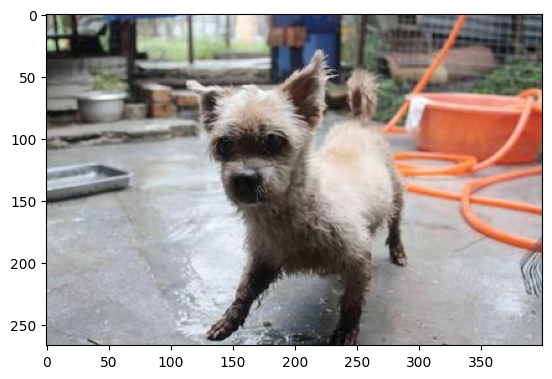

In [74]:
from skimage import io

img = io.imread(X_train['Images'][0])

plt.imshow(img)

In [75]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
import cv2

gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [77]:
# Computing the SIFT detector and descriptors

sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

In [78]:
descriptors

array([[48.,  6.,  0., ...,  0.,  0.,  0.],
       [ 7.,  0.,  0., ...,  2.,  1.,  2.],
       [71.,  4.,  0., ...,  0.,  0.,  0.],
       ...,
       [76.,  4.,  1., ...,  0.,  0.,  0.],
       [23., 28.,  8., ...,  0.,  0.,  0.],
       [14.,  2.,  0., ...,  1.,  0.,  1.]], dtype=float32)

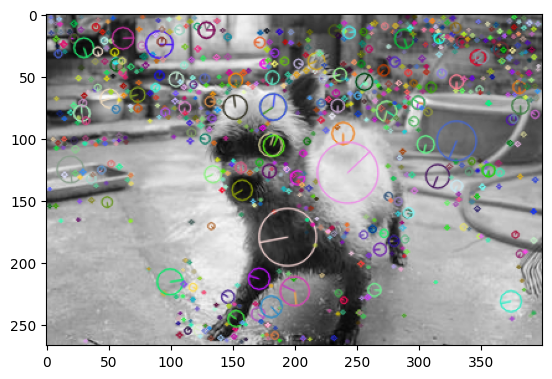

In [79]:
# Plot the image with the descriptors

cv2.drawKeypoints(gray, keypoints, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

## Extract features and build BOFs

In [80]:
#First step, extract the SIFTs of each image

def extract_SIFT(img_lst):
    nbSIFTs = 0    # Number of SIFTs
    SIFTs = []  # List of SIFTs descriptors 
    #dimImgs = []   # Nb of descriptors associated to each images

    for pathImg in tqdm(img_lst, position=0, leave=True): 
        img = io.imread(pathImg)
        if len(img.shape)==2: # this is a grey level image
            gray = img
        else: # we expect the image to be a RGB image or RGBA
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(gray, None)
        if len(kp) == 0 and img.shape[2]==4: #some images are mask on alpha channel: we thus extract this channel if not kpts have been detected
            gray = img[:,:,3]
            sift = cv2.SIFT_create()
            kp, des = sift.detectAndCompute(gray, None)
        
        nbSIFTs += des.shape[0]
        SIFTs.append(des)

    return nbSIFTs, SIFTs

In [81]:
nbSIFTs, SIFTs = extract_SIFT(X_train['Images'])
print('nbSifts: ', nbSIFTs)

100%|██████████| 100/100 [00:03<00:00, 25.26it/s]

nbSifts:  67749


In [82]:
print(len(SIFTs))
print(SIFTs[0].shape)
print(SIFTs[0])

100
(882, 128)
[[48.  6.  0. ...  0.  0.  0.]
 [ 7.  0.  0. ...  2.  1.  2.]
 [71.  4.  0. ...  0.  0.  0.]
 ...
 [76.  4.  1. ...  0.  0.  0.]
 [23. 28.  8. ...  0.  0.  0.]
 [14.  2.  0. ...  1.  0.  1.]]


In [83]:
for i, item in enumerate(SIFTs):
    if item is None:
        print("The element at index {} is None".format(i))

In [84]:
# Step 2: clusterize the SIFT

from sklearn.cluster import MiniBatchKMeans

def clusterize(SIFTs, nb_img_features=5, verbose=False):
    clusterizer = MiniBatchKMeans(n_clusters=nb_img_features)   # nb_img_features is a hyperparameter
    # learning of the clustering
    flat_list = SIFTs[0]
    for descriptor in SIFTs[1:]:
        flat_list = np.concatenate((flat_list, descriptor))
        if verbose:
            print("shape:", descriptor.shape, flat_list.shape)
    clusterizer.fit(flat_list)
    # we now know the label of each SIFT descriptor
    return clusterizer

In [85]:
clusterizer = clusterize(SIFTs, verbose=True)

shape: (250, 128) (1132, 128)
shape: (312, 128) (1444, 128)
shape: (502, 128) (1946, 128)
shape: (1298, 128) (3244, 128)
shape: (556, 128) (3800, 128)
shape: (1000, 128) (4800, 128)
shape: (727, 128) (5527, 128)
shape: (1291, 128) (6818, 128)
shape: (228, 128) (7046, 128)
shape: (764, 128) (7810, 128)
shape: (315, 128) (8125, 128)
shape: (730, 128) (8855, 128)
shape: (171, 128) (9026, 128)
shape: (288, 128) (9314, 128)
shape: (637, 128) (9951, 128)
shape: (289, 128) (10240, 128)
shape: (519, 128) (10759, 128)
shape: (140, 128) (10899, 128)
shape: (350, 128) (11249, 128)
shape: (1690, 128) (12939, 128)
shape: (1001, 128) (13940, 128)
shape: (634, 128) (14574, 128)
shape: (236, 128) (14810, 128)
shape: (992, 128) (15802, 128)
shape: (652, 128) (16454, 128)
shape: (525, 128) (16979, 128)
shape: (809, 128) (17788, 128)
shape: (492, 128) (18280, 128)
shape: (125, 128) (18405, 128)
shape: (736, 128) (19141, 128)
shape: (1560, 128) (20701, 128)
shape: (547, 128) (21248, 128)
shape: (1303, 128

In [86]:
# Step 3: build the BOW representation of each images (i.e. construction of the BOFs)

def build_BOFs(SIFTs, clusterizer, verbose=False):
    ok, nok = 0, 0
    #BOF initialization
    nb_img_features = clusterizer.get_params()['n_clusters']
    BOFs = np.empty(shape=(0, nb_img_features), dtype=int)

    # Build label list
    flat_list = SIFTs[0]
    for des in SIFTs[1:]:
        flat_list = np.concatenate((flat_list, des))
        if verbose:
            print("shape:", des.shape, flat_list.shape)
    labels = clusterizer.predict(flat_list)

    # loop on images
    i = 0 # index for the loop on SIFTs
    for des in SIFTs:
        #initialisation of the bof for the current image
        tmpBof = np.array([0]*nb_img_features)
        j = 0
        # for every SIFT of the current image:
        nbs = des.shape[0]
        while j < nbs:
            tmpBof[labels[i]] += 1
            j+=1
            i+=1
        BOFs = np.concatenate((BOFs, tmpBof.reshape(1,-1)), axis=0)
    if verbose:
        print("BOFs : ", BOFs)
    
    return BOFs

In [87]:
BOFs = build_BOFs(SIFTs, clusterizer, verbose=True)
BOFs.shape

shape: (250, 128) (1132, 128)
shape: (312, 128) (1444, 128)
shape: (502, 128) (1946, 128)
shape: (1298, 128) (3244, 128)
shape: (556, 128) (3800, 128)
shape: (1000, 128) (4800, 128)
shape: (727, 128) (5527, 128)
shape: (1291, 128) (6818, 128)
shape: (228, 128) (7046, 128)
shape: (764, 128) (7810, 128)
shape: (315, 128) (8125, 128)
shape: (730, 128) (8855, 128)
shape: (171, 128) (9026, 128)
shape: (288, 128) (9314, 128)
shape: (637, 128) (9951, 128)
shape: (289, 128) (10240, 128)
shape: (519, 128) (10759, 128)
shape: (140, 128) (10899, 128)
shape: (350, 128) (11249, 128)
shape: (1690, 128) (12939, 128)
shape: (1001, 128) (13940, 128)
shape: (634, 128) (14574, 128)
shape: (236, 128) (14810, 128)
shape: (992, 128) (15802, 128)
shape: (652, 128) (16454, 128)
shape: (525, 128) (16979, 128)
shape: (809, 128) (17788, 128)
shape: (492, 128) (18280, 128)
shape: (125, 128) (18405, 128)
shape: (736, 128) (19141, 128)
shape: (1560, 128) (20701, 128)
shape: (547, 128) (21248, 128)
shape: (1303, 128

(100, 5)

In [88]:
from sklearn.base import BaseEstimator,TransformerMixin

def list_comparaison(l1, l2):
    if not l1 is None \
        and not l2 is None \
        and len(l1)==len(l2) \
        and len(l1)==sum([1 for i,j in zip(l1, l2) if i==j]):
        return True
    return False
    
class BOF_extractor(BaseEstimator,TransformerMixin): 
    X = None
    SIFTs = None
    nbSIFTs = 0
    
    def __init__(self, nb_img_features=10, verbose=False):
        self.nb_img_features = nb_img_features
        self.verbose = verbose
        self.path = path
        if self.verbose:
            print("BOF.init()")
        
    def fit(self, X, y=None):
        if self.verbose:
            print("BOF.fit()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)
        self.X = X
        self.SIFTs = SIFTs 
        self.nbSIFTs = nbSIFTs
        self.clusterizer = clusterize(SIFTs, self.nb_img_features, self.verbose)
        
    def transform(self, X, y=None):
        if self.verbose:
            print("BOF.transform()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)

        if self.verbose:
            print("nbSIFTs:", nbSIFTs)
        return build_BOFs(SIFTs, self.clusterizer, self.verbose)
    
    def fit_transform(self, X, y=None):
        if self.verbose:
            print("BOF.fit_transform()")
        if list_comparaison(X, self.X):
            SIFTs = self.SIFTs 
            nbSIFTs = self.nbSIFTs
        else:
            if self.verbose:
                print("extract_SIFT")
            nbSIFTs, SIFTs = extract_SIFT(X)
        self.X = X
        self.SIFTs = SIFTs 
        self.nbSIFTs = nbSIFTs
        self.clusterizer = clusterize(SIFTs, self.nb_img_features, self.verbose)
        return build_BOFs(SIFTs, self.clusterizer, self.verbose)

In [89]:
test_BOF_extractor = BOF_extractor(nb_img_features=5, verbose=True)

BOF.init()


In [90]:
test_BOF_extractor.fit(X_train['Images'])

BOF.fit()
extract_SIFT


100%|██████████| 100/100 [00:03<00:00, 25.41it/s]


shape: (250, 128) (1132, 128)
shape: (312, 128) (1444, 128)
shape: (502, 128) (1946, 128)
shape: (1298, 128) (3244, 128)
shape: (556, 128) (3800, 128)
shape: (1000, 128) (4800, 128)
shape: (727, 128) (5527, 128)
shape: (1291, 128) (6818, 128)
shape: (228, 128) (7046, 128)
shape: (764, 128) (7810, 128)
shape: (315, 128) (8125, 128)
shape: (730, 128) (8855, 128)
shape: (171, 128) (9026, 128)
shape: (288, 128) (9314, 128)
shape: (637, 128) (9951, 128)
shape: (289, 128) (10240, 128)
shape: (519, 128) (10759, 128)
shape: (140, 128) (10899, 128)
shape: (350, 128) (11249, 128)
shape: (1690, 128) (12939, 128)
shape: (1001, 128) (13940, 128)
shape: (634, 128) (14574, 128)
shape: (236, 128) (14810, 128)
shape: (992, 128) (15802, 128)
shape: (652, 128) (16454, 128)
shape: (525, 128) (16979, 128)
shape: (809, 128) (17788, 128)
shape: (492, 128) (18280, 128)
shape: (125, 128) (18405, 128)
shape: (736, 128) (19141, 128)
shape: (1560, 128) (20701, 128)
shape: (547, 128) (21248, 128)
shape: (1303, 128

In [91]:
BOFs = test_BOF_extractor.transform(X_train['Images'])
BOFs.shape

BOF.transform()
nbSIFTs: 67749
shape: (250, 128) (1132, 128)
shape: (312, 128) (1444, 128)
shape: (502, 128) (1946, 128)
shape: (1298, 128) (3244, 128)
shape: (556, 128) (3800, 128)
shape: (1000, 128) (4800, 128)
shape: (727, 128) (5527, 128)
shape: (1291, 128) (6818, 128)
shape: (228, 128) (7046, 128)
shape: (764, 128) (7810, 128)
shape: (315, 128) (8125, 128)
shape: (730, 128) (8855, 128)
shape: (171, 128) (9026, 128)
shape: (288, 128) (9314, 128)
shape: (637, 128) (9951, 128)
shape: (289, 128) (10240, 128)
shape: (519, 128) (10759, 128)
shape: (140, 128) (10899, 128)
shape: (350, 128) (11249, 128)
shape: (1690, 128) (12939, 128)
shape: (1001, 128) (13940, 128)
shape: (634, 128) (14574, 128)
shape: (236, 128) (14810, 128)
shape: (992, 128) (15802, 128)
shape: (652, 128) (16454, 128)
shape: (525, 128) (16979, 128)
shape: (809, 128) (17788, 128)
shape: (492, 128) (18280, 128)
shape: (125, 128) (18405, 128)
shape: (736, 128) (19141, 128)
shape: (1560, 128) (20701, 128)
shape: (547, 128)

(100, 5)

In [92]:
BOFs = test_BOF_extractor.fit_transform(X_train['Images'])
BOFs.shape

BOF.fit_transform()
shape: (250, 128) (1132, 128)
shape: (312, 128) (1444, 128)
shape: (502, 128) (1946, 128)
shape: (1298, 128) (3244, 128)
shape: (556, 128) (3800, 128)
shape: (1000, 128) (4800, 128)
shape: (727, 128) (5527, 128)
shape: (1291, 128) (6818, 128)
shape: (228, 128) (7046, 128)
shape: (764, 128) (7810, 128)
shape: (315, 128) (8125, 128)
shape: (730, 128) (8855, 128)
shape: (171, 128) (9026, 128)
shape: (288, 128) (9314, 128)
shape: (637, 128) (9951, 128)
shape: (289, 128) (10240, 128)
shape: (519, 128) (10759, 128)
shape: (140, 128) (10899, 128)
shape: (350, 128) (11249, 128)
shape: (1690, 128) (12939, 128)
shape: (1001, 128) (13940, 128)
shape: (634, 128) (14574, 128)
shape: (236, 128) (14810, 128)
shape: (992, 128) (15802, 128)
shape: (652, 128) (16454, 128)
shape: (525, 128) (16979, 128)
shape: (809, 128) (17788, 128)
shape: (492, 128) (18280, 128)
shape: (125, 128) (18405, 128)
shape: (736, 128) (19141, 128)
shape: (1560, 128) (20701, 128)
shape: (547, 128) (21248, 12

(100, 5)

In [93]:
test_set = pd.read_csv(path+"test (1).csv")
test_set


,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed
0,Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,No,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",5df99d229-2.jpg,Domestic_Short_Hair
1,Dog,8.0,Male,Black,Brown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Stray puppy that came to my house. Obedient, w...",a08030c6f-2.jpg,Mixed_Breed
2,Dog,2.0,Female,Brown,Cream,White,Medium,Unknown,Yes,Yes,No,Healthy,0.0,A kind person rescued her in an abandoned buil...,c8c3eb092-1.jpg,Mixed_Breed
3,Dog,3.0,Female,Black,Brown,Unknown,Medium,Yes,Yes,Yes,No,Healthy,0.0,"Sweety as her name says is a sweet , fun and c...",56e91b142-1.jpg,Mixed_Breed
4,Cat,3.0,Female,Brown,Cream,White,Medium,Yes,No,No,No,Healthy,10.0,3 months old kitten for adoption. Female and p...,094636517-1.jpg,Domestic_Short_Hair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Cat,4.0,Male,Yellow,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,A very friendly kitty! and it likes to follow ...,da8c280f1-6.jpg,Domestic_Short_Hair
496,Dog,1.0,Female,Brown,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Female puppy for adoption, 6 weeks Please call...",82563b26e-1.jpg,Mixed_Breed
497,Cat,10.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,100.0,"Mimi had a hard start to life, she was raped a...",1991b0817-1.jpg,Domestic_Short_Hair
498,Cat,12.0,Female,Black,White,Unknown,Medium,Yes,Yes,Yes,Yes,Healthy,120.0,"When I found her last year, her mouth is bleed...",67d786538-1.jpg,Domestic_Short_Hair


In [103]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, TransformerMixin

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [107]:
image_preprocessor = BOF_extractor(nb_img_features=3, verbose=False)

# Define the models
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "MLP": MLPClassifier(),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "GaussianProcess": GaussianProcessClassifier(),
    "SVC": SVC(),
    "SGD": SGDClassifier(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
}


# Define the hyper-parameter grid for each model
rf_param_grid = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [10, 20, 30],
    "model__max_features": ["auto", "sqrt"],
}

gb_param_grid = {
    "model__n_estimators": [50, 100, 200],
    "model__learning_rate": [0.1, 0.01, 0.001],
    "model__max_depth": [3, 5, 7],
}

ada_param_grid = {
    "model__n_estimators": [50, 100, 200],
    "model__learning_rate": [0.1, 0.01, 0.001],
}

mlp_param_grid = {
    "model__hidden_layer_sizes": [(50,), (100,), (200,)],
    "model__activation": ["relu", "tanh"],
    "model__solver": ["adam", "lbfgs"],
}

nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gp_param_grid = {
    "model__max_iter_predict": [50, 100, 200],
    "model__n_restarts_optimizer": [0, 1, 2],
}

svc_param_grid = {
    "model__kernel": ["linear", "poly", "rbf", "sigmoid"],
    "model__C": [0.1, 1, 10],
}

sgd_param_grid = {
    "model__loss": ["hinge", "log", "modified_huber"],
    "model__penalty": ["l1", "l2", "elasticnet"],
}

knn_param_grid = {
    "model__n_neighbors": [5, 10, 15],
    "model__weights": ["uniform", "distance"],
}

dt_param_grid = {
    "model__max_depth": [10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__max_features": ["auto", "sqrt"],
}

In [108]:
# Define the hyper-parameter grid for the preprocessing pipeline
preproc_param_grid = {
    "preprocessing__numerical encoding": [OneHotEncoder(),OrdinalEncoder()],
    "preprocessing__numerical encoding": [StandardScaler(), MinMaxScaler()],
    "preprocessing__text encoding": [TfidfVectorizer(), CountVectorizer()],
    "preprocessing_images": [image_preprocessor, img_cols],
}


dim_red = FeatureUnion([("Truncated SVD", TruncatedSVD(n_components=100))])

In [ ]:
# Loop over each model and perform grid search with cross-validation
for name, model in models.items():
    # Create a pipeline that includes the preprocessing pipeline and the model
    pipe = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("dimensionality reduction", dim_red),
        ("model", model),
    ])
    
    # Define the hyper-parameter grid for the current model and preprocessing pipeline
    if name == "RandomForest":
        param_grid = {**preproc_param_grid, **rf_param_grid}
    elif name == "GradientBoosting":
        param_grid = {**preproc_param_grid, **gb_param_grid}
    elif name == "AdaBoost":
        param_grid = {**preproc_param_grid, **ada_param_grid}
    elif name == "MLP":
        param_grid = {**preproc_param_grid, **mlp_param_grid}
    elif name == "GaussianNB":
        param_grid = {**preproc_param_grid, **nb_param_grid}
    elif name == "GaussianProcess":
        param_grid = {**preproc_param_grid, **gp_param_grid}
    elif name == "SVC":
        param_grid = {**preproc_param_grid, **svc_param_grid}
    elif name == "SGD":
        param_grid = {**preproc_param_grid, **sgd_param_grid}
    elif name == "KNN":
        param_grid = {**preproc_param_grid, **knn_param_grid}
    elif name == "DecisionTree":
        param_grid = {**preproc_param_grid, **dt_param_grid}
    
    # Perform grid search with cross-validation
    print(f"\n\n--- {name} ---")
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    
    # Save the best model and its hyper-parameters
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    best_score = grid.best_score_
    print(f"Best model: {best_model}")
    print(f"Best hyper-parameters: {best_params}")
    print(f"Best score: {best_score}")
    
    # Save the scores to a CSV file
    scores_df = pd.DataFrame(grid.cv_results_)
    scores_df.to_csv(f"{name}_scores.csv", index=False)
